In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset

# processing the file in chunks due to mixed datatypes in column

amazon_fashion_df = pd.read_csv('Amazon Fashion - YT.csv', encoding='latin1', low_memory=False)

amazon_sales_df = pd.read_excel('Amazon Sale Report - YT.xlsx')

In [3]:
amazon_fashion_df

,amazon_prime__y_or_n,asin,best_seller_tag__y_or_n,brand,colour,delivery_type,discount_percentage,large,left_in_stock,no_of_reviews,...,sales_price,Category,seller_name,Saller ID,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,N,B07STS2W9T,N,LA' Facon,NaN,fulfilled_by_merchant,40%,https://images-na.ssl-images-amazon.com/images...,NaN,39.0,...,200.0,WomensKurtasKurtis,Harivansh,26d41bdc1495de290bc8e6062d927729,NaN,NaN,NaN,NaN,NaN,NaN
1,N,B07N6TD2WL,N,NaN,NaN,fulfilled_by_merchant,36%,https://images-na.ssl-images-amazon.com/images...,NaN,300.0,...,265.0,MensT_Shirts,Madhav,410c62298852e68f34c35560f2311e5a,NaN,NaN,NaN,NaN,NaN,NaN
2,Y,B07WJ6WPN1,N,LOVISTA,NaN,fulfilled_by_merchant,60%,https://images-na.ssl-images-amazon.com/images...,NaN,7.0,...,660.0,WomensKurtasKurtis,Madan Mohan,52e31bb31680b0ec73de0d781a23cc0a,NaN,NaN,NaN,NaN,NaN,NaN
3,N,B07PYSF4WZ,N,NaN,NaN,fulfilled_by_merchant,61%,https://images-na.ssl-images-amazon.com/images...,NaN,7.0,...,195.0,MensT_Shirts,Gopal,25798d6dc43239c118452d1bee0fb088,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,B082KXNM7X,N,NaN,NaN,fulfilled_by_merchant,67%,https://images-na.ssl-images-amazon.com/images...,NaN,33.0,...,1914.0,MensTracksuits,Vishakha,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
amazon_sales_df

,Unnamed: 0,Sales Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,ship-city,ship-state,ship-postal-code,ship-country,fulfilled-by,NaN
1,405-8078784-5731545,2022-04-30 00:00:00,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B07STS2W9T,NaN,0,INR,MUMBAI,MAHARASHTRA,400081,IN,Easy Ship,NaN
2,171-9198151-1101146,2022-04-30 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B07N6TD2WL,Shipped,1,INR,BENGALURU,KARNATAKA,560085,IN,Easy Ship,NaN
3,404-0687676-7273146,2022-04-30 00:00:00,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WJ6WPN1,Shipped,1,INR,NAVI MUMBAI,MAHARASHTRA,410210,IN,NaN,NaN
4,403-9615377-8133951,2022-04-30 00:00:00,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B07PYSF4WZ,NaN,0,INR,PUDUCHERRY,PUDUCHERRY,605008,IN,Easy Ship,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,2022-05-31 00:00:00,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B07MR366FG,Shipped,1,INR,HYDERABAD,TELANGANA,500013,IN,NaN,0.0
128972,402-9551604-7544318,2022-05-31 00:00:00,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B07YSF7JNF,Shipped,1,INR,GURUGRAM,HARYANA,122004,IN,NaN,0.0
128973,407-9547469-3152358,2022-05-31 00:00:00,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B00LSR9U2S,Shipped,1,INR,HYDERABAD,TELANGANA,500049,IN,NaN,0.0
128974,402-6184140-0545956,2022-05-31 00:00:00,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B077PLT2SP,Shipped,1,INR,Halol,Gujarat,389350,IN,NaN,0.0


In [5]:
# observing dataframe

amazon_fashion_df.head()

,amazon_prime__y_or_n,asin,best_seller_tag__y_or_n,brand,colour,delivery_type,discount_percentage,large,left_in_stock,no_of_reviews,...,sales_price,Category,seller_name,Saller ID,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,N,B07STS2W9T,N,LA' Facon,NaN,fulfilled_by_merchant,40%,https://images-na.ssl-images-amazon.com/images...,NaN,39.0,...,200.0,WomensKurtasKurtis,Harivansh,26d41bdc1495de290bc8e6062d927729,NaN,NaN,NaN,NaN,NaN,NaN
1,N,B07N6TD2WL,N,NaN,NaN,fulfilled_by_merchant,36%,https://images-na.ssl-images-amazon.com/images...,NaN,300.0,...,265.0,MensT_Shirts,Madhav,410c62298852e68f34c35560f2311e5a,NaN,NaN,NaN,NaN,NaN,NaN
2,Y,B07WJ6WPN1,N,LOVISTA,NaN,fulfilled_by_merchant,60%,https://images-na.ssl-images-amazon.com/images...,NaN,7.0,...,660.0,WomensKurtasKurtis,Madan Mohan,52e31bb31680b0ec73de0d781a23cc0a,NaN,NaN,NaN,NaN,NaN,NaN
3,N,B07PYSF4WZ,N,NaN,NaN,fulfilled_by_merchant,61%,https://images-na.ssl-images-amazon.com/images...,NaN,7.0,...,195.0,MensT_Shirts,Gopal,25798d6dc43239c118452d1bee0fb088,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,B082KXNM7X,N,NaN,NaN,fulfilled_by_merchant,67%,https://images-na.ssl-images-amazon.com/images...,NaN,33.0,...,1914.0,MensTracksuits,Vishakha,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# observing dataframe

amazon_sales_df.head()

,Unnamed: 0,Sales Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,ship-city,ship-state,ship-postal-code,ship-country,fulfilled-by,NaN
1,405-8078784-5731545,2022-04-30 00:00:00,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B07STS2W9T,NaN,0,INR,MUMBAI,MAHARASHTRA,400081,IN,Easy Ship,NaN
2,171-9198151-1101146,2022-04-30 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B07N6TD2WL,Shipped,1,INR,BENGALURU,KARNATAKA,560085,IN,Easy Ship,NaN
3,404-0687676-7273146,2022-04-30 00:00:00,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WJ6WPN1,Shipped,1,INR,NAVI MUMBAI,MAHARASHTRA,410210,IN,NaN,NaN
4,403-9615377-8133951,2022-04-30 00:00:00,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B07PYSF4WZ,NaN,0,INR,PUDUCHERRY,PUDUCHERRY,605008,IN,Easy Ship,NaN


In [7]:
# describing shapes of sales dataset

amazon_sales_df.shape

(128976, 20)

In [8]:
# describing shapes of fashion dataset

amazon_fashion_df.shape

(43744, 25)

In [9]:
# describing the sales dataframe on its column, data types and not null sales

amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   128976 non-null  object 
 1   Sales Data   128976 non-null  object 
 2   Unnamed: 2   128976 non-null  object 
 3   Unnamed: 3   128976 non-null  object 
 4   Unnamed: 4   128976 non-null  object 
 5   Unnamed: 5   128976 non-null  object 
 6   Unnamed: 6   128976 non-null  object 
 7   Unnamed: 7   128976 non-null  object 
 8   Unnamed: 8   128976 non-null  object 
 9   Unnamed: 9   128976 non-null  object 
 10  Unnamed: 10  128976 non-null  object 
 11  Unnamed: 11  122104 non-null  object 
 12  Unnamed: 12  128976 non-null  object 
 13  Unnamed: 13  121181 non-null  object 
 14  Unnamed: 14  128943 non-null  object 
 15  Unnamed: 15  128943 non-null  object 
 16  Unnamed: 16  128943 non-null  object 
 17  Unnamed: 17  128943 non-null  object 
 18  Unnamed: 18  39278 non-n

In [10]:
# describing the fashion dataframe on its column, data types and not null sales

amazon_fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amazon_prime__y_or_n     29876 non-null  object 
 1   asin                     29876 non-null  object 
 2   best_seller_tag__y_or_n  29876 non-null  object 
 3   brand                    21734 non-null  object 
 4   colour                   5976 non-null   object 
 5   delivery_type            29875 non-null  object 
 6   discount_percentage      29924 non-null  object 
 7   large                    28731 non-null  object 
 8   left_in_stock            3043 non-null   float64
 9   no_of_reviews            29924 non-null  float64
 10  description              24241 non-null  object 
 11  product_details          28695 non-null  object 
 12  product_name             29876 non-null  object 
 13  product_url              29876 non-null  object 
 14  rating                

In [11]:
# generating descriptive statistics, including count, mean, std, min, and quartiles, for numerical columns in the sales DataFrame 

amazon_sales_df.describe()

,Unnamed: 19
count,79925.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [12]:
# generating descriptive statistics, including count, mean, std, min, and quartiles, for numerical columns in the fashion DataFrame 

amazon_fashion_df.describe()

,left_in_stock,no_of_reviews,rating,sales_price
count,3043.000000,29924.000000,2.987500e+04,43744.000000
mean,2.090043,135.749900,3.347686e+04,532.617906
std,1.316877,515.531463,5.785569e+06,866.998537
min,1.000000,1.000000,1.000000e+00,0.000000
25%,1.000000,4.000000,3.500000e+00,0.000000
50%,2.000000,15.000000,4.000000e+00,339.000000
75%,3.000000,72.000000,4.900000e+00,689.000000
max,5.000000,9896.000000,1.000000e+09,9988.000000


In [13]:
# counting the number of values in sales data

amazon_sales_df.count()

Unnamed: 0     128976
Sales Data     128976
Unnamed: 2     128976
Unnamed: 3     128976
Unnamed: 4     128976
Unnamed: 5     128976
Unnamed: 6     128976
Unnamed: 7     128976
Unnamed: 8     128976
Unnamed: 9     128976
Unnamed: 10    128976
Unnamed: 11    122104
Unnamed: 12    128976
Unnamed: 13    121181
Unnamed: 14    128943
Unnamed: 15    128943
Unnamed: 16    128943
Unnamed: 17    128943
Unnamed: 18     39278
Unnamed: 19     79925
dtype: int64

In [14]:
# counting the number of values in fashion data

amazon_fashion_df.count()

amazon_prime__y_or_n       29876
asin                       29876
best_seller_tag__y_or_n    29876
brand                      21734
colour                      5976
delivery_type              29875
discount_percentage        29924
large                      28731
left_in_stock               3043
no_of_reviews              29924
description                24241
product_details            28695
product_name               29876
product_url                29876
rating                     29875
sales_price                43744
Category                   29924
seller_name                 9966
Saller ID                  29912
Unnamed: 19                    2
Unnamed: 20                    2
Unnamed: 21                    2
Unnamed: 22                    2
Unnamed: 23                    2
Unnamed: 24                    1
dtype: int64

In [15]:
# Data Cleaning

# checking for null values in sales data

amazon_sales_df.isnull().sum()

Unnamed: 0         0
Sales Data         0
Unnamed: 2         0
Unnamed: 3         0
Unnamed: 4         0
Unnamed: 5         0
Unnamed: 6         0
Unnamed: 7         0
Unnamed: 8         0
Unnamed: 9         0
Unnamed: 10        0
Unnamed: 11     6872
Unnamed: 12        0
Unnamed: 13     7795
Unnamed: 14       33
Unnamed: 15       33
Unnamed: 16       33
Unnamed: 17       33
Unnamed: 18    89698
Unnamed: 19    49051
dtype: int64

In [16]:
# checking for null values in fashion data

amazon_fashion_df.isnull().sum()

amazon_prime__y_or_n       13868
asin                       13868
best_seller_tag__y_or_n    13868
brand                      22010
colour                     37768
delivery_type              13869
discount_percentage        13820
large                      15013
left_in_stock              40701
no_of_reviews              13820
description                19503
product_details            15049
product_name               13868
product_url                13868
rating                     13869
sales_price                    0
Category                   13820
seller_name                33778
Saller ID                  13832
Unnamed: 19                43742
Unnamed: 20                43742
Unnamed: 21                43742
Unnamed: 22                43742
Unnamed: 23                43742
Unnamed: 24                43743
dtype: int64

In [17]:
# dropping the rows with null values and re-indexing the data series in sales data

amazon_sales_df = amazon_sales_df.dropna()

# resetting the index
amazon_sales_df = amazon_sales_df.reset_index(drop=True)

amazon_sales_df.shape

(19428, 20)

In [18]:
# dropping the rows with null values and re-indexing the data series in sales data

amazon_fashion_df = amazon_fashion_df.dropna()

# resetting the index
amazon_fashion_df = amazon_fashion_df.reset_index(drop=True)

amazon_fashion_df.shape

(0, 25)

In [19]:
amazon_fashion_df

,amazon_prime__y_or_n,asin,best_seller_tag__y_or_n,brand,colour,delivery_type,discount_percentage,large,left_in_stock,no_of_reviews,...,sales_price,Category,seller_name,Saller ID,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24


In [20]:
amazon_sales_df

,Unnamed: 0,Sales Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,408-4858463-2356347,2022-05-31 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,M,B07TKDP625,Shipped,1,INR,RAJAHMUNDRY,ANDHRA PRADESH,533126,IN,Easy Ship,0.0
1,402-7697834-2682766,2022-05-31 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,XXL,B01N53S07N,Shipped,1,INR,CHENNAI,TAMIL NADU,600042,IN,Easy Ship,0.0
2,402-7031777-0396341,2022-05-31 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,XS,B07HHWJSXW,Shipped,1,INR,NEDUMANGAD,KERALA,695541,IN,Easy Ship,0.0
3,408-1235521-4337163,2022-05-31 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,L,B07YQS2336,Shipped,1,INR,LEH,JAMMU & KASHMIR,194101,IN,Easy Ship,0.0
4,403-3845187-4421165,2022-05-31 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,XL,B07R9HP5VG,Shipped,1,INR,PIMPRI CHINCHWAD,MAHARASHTRA,411027,IN,Easy Ship,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,405-4724097-1016369,2022-06-01 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,S,B015PKQEVS,Shipped,1,INR,ALLUR,ANDHRA PRADESH,524315,IN,Easy Ship,0.0
19424,405-4724097-1016369,2022-06-01 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,S,B073QQG741,Shipped,1,INR,ALLUR,ANDHRA PRADESH,524315,IN,Easy Ship,0.0
19425,405-4724097-1016369,2022-06-01 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,S,B00PA1JHCG,Shipped,1,INR,ALLUR,ANDHRA PRADESH,524315,IN,Easy Ship,0.0
19426,405-6493630-8542756,2022-05-31 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,M,B07NBGWK6D,Shipped,1,INR,NOIDA,UTTAR PRADESH,201301,IN,Easy Ship,0.0


In [21]:
# Data Transformation

# date column should be in datetime format

amazon_sales_df['Sales Data'] = pd.to_datetime(amazon_sales_df['Sales Data'])

In [22]:
amazon_sales_df

,Unnamed: 0,Sales Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,408-4858463-2356347,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,M,B07TKDP625,Shipped,1,INR,RAJAHMUNDRY,ANDHRA PRADESH,533126,IN,Easy Ship,0.0
1,402-7697834-2682766,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,XXL,B01N53S07N,Shipped,1,INR,CHENNAI,TAMIL NADU,600042,IN,Easy Ship,0.0
2,402-7031777-0396341,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,XS,B07HHWJSXW,Shipped,1,INR,NEDUMANGAD,KERALA,695541,IN,Easy Ship,0.0
3,408-1235521-4337163,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,L,B07YQS2336,Shipped,1,INR,LEH,JAMMU & KASHMIR,194101,IN,Easy Ship,0.0
4,403-3845187-4421165,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,XL,B07R9HP5VG,Shipped,1,INR,PIMPRI CHINCHWAD,MAHARASHTRA,411027,IN,Easy Ship,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,S,B015PKQEVS,Shipped,1,INR,ALLUR,ANDHRA PRADESH,524315,IN,Easy Ship,0.0
19424,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,S,B073QQG741,Shipped,1,INR,ALLUR,ANDHRA PRADESH,524315,IN,Easy Ship,0.0
19425,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,S,B00PA1JHCG,Shipped,1,INR,ALLUR,ANDHRA PRADESH,524315,IN,Easy Ship,0.0
19426,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,M,B07NBGWK6D,Shipped,1,INR,NOIDA,UTTAR PRADESH,201301,IN,Easy Ship,0.0


In [23]:
# extracting month and year from the sales data

amazon_sales_df['Year'] = amazon_sales_df['Sales Data'].dt.year
amazon_sales_df['Year'] 

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
19423    2022
19424    2022
19425    2022
19426    2022
19427    2022
Name: Year, Length: 19428, dtype: int32

In [24]:
amazon_sales_df['Month'] = amazon_sales_df['Sales Data'].dt.month
amazon_sales_df['Month']

0        5
1        5
2        5
3        5
4        5
        ..
19423    6
19424    6
19425    6
19426    5
19427    5
Name: Month, Length: 19428, dtype: int32

In [25]:
# ensuring sales column is numeric

# coerce converts non numeric values to NaN

amazon_sales_df['Sales'] = pd.to_numeric(amazon_sales_df['Sales Data'], errors='coerce')

In [26]:
# grouping month for monthly sales trend

monthly_sales_trend = amazon_sales_df.groupby('Month')['Sales'].sum().reset_index()

In [27]:
monthly_sales_trend

,Month,Sales
0,4,-5801928221128654848
1,5,5215155385286590464
2,6,-5665323566196850688


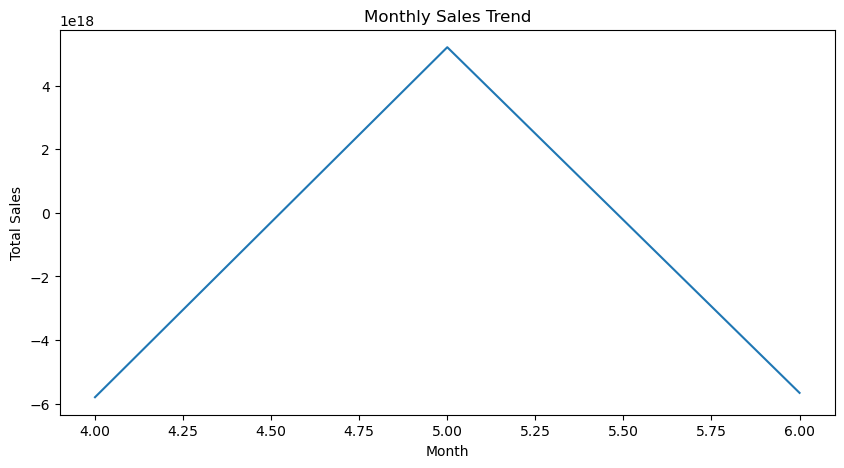

In [28]:
# plotting a graph to analyse trends

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales_trend, x='Month', y='Sales')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [29]:
# grouping year for yearly sales trends

yearly_sales_trend = amazon_sales_df.groupby('Year')['Sales'].sum().reset_index()

In [30]:
yearly_sales_trend

,Year,Sales
0,2022,-6252096402038915072


In [31]:
# yearly month wise sales

yearly_monthly_sales_trend = amazon_sales_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [32]:
yearly_monthly_sales_trend

,Year,Month,Sales
0,2022,4,-5801928221128654848
1,2022,5,5215155385286590464
2,2022,6,-5665323566196850688


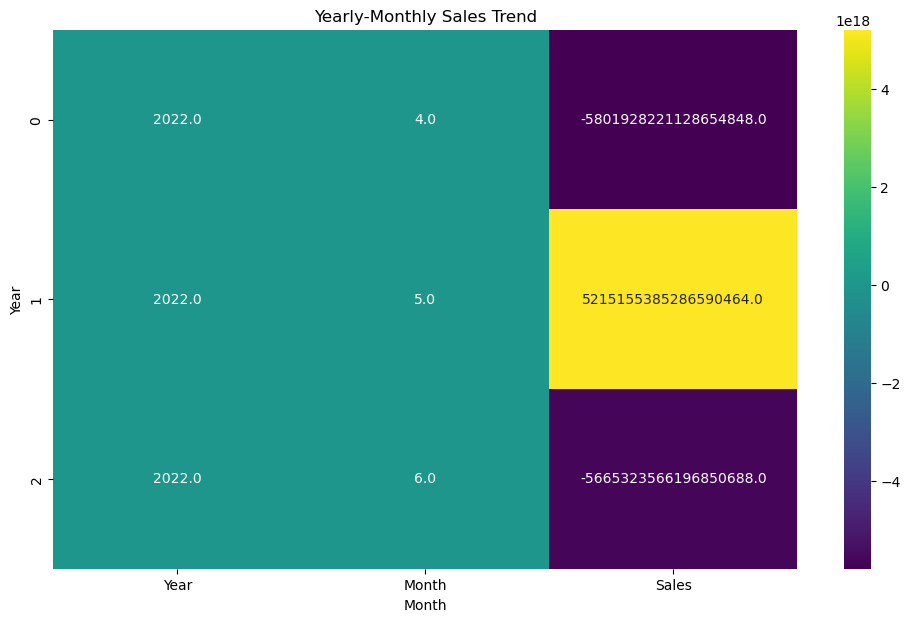

In [33]:
plt.figure(figsize=(12, 7))
sns.heatmap(yearly_monthly_sales_trend, annot=True, fmt=".1f", cmap='viridis')

plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [34]:
#defining a function

def summarystat(column):
    
    #total sum of variables
    SUM = amazon_sales_df[f"{column}"].sum()
    #mean method shows the avegrage value of the variable
    MEAN = amazon_sales_df[f"{column}"].mean()
    #std method calculates the standard deviation
    STD = amazon_sales_df[f"{column}"].std()
    #skew method shows the distribution of skewness to left or right
    SKEW = amazon_sales_df[f"{column}"].skew()
    #kurtosis method calculates the kurtosis of data distribution of a single variable
    KURTOSIS = amazon_sales_df[f"{column}"].kurtosis()
         
    # printing summary statistics
    
    print(f"The summary statistics of sum of the column {column} is: ",SUM)
    print(f"The summary statistics of mean of the column {column} is: ",MEAN)
    print(f"The summary statistics of standard deviation of the column {column} is: ",STD)
    print(f"The summary statistics of skew of the column {column} is: ",SKEW)
    print(f"The summary statistics of kurtosis of the column {column} is: ",KURTOSIS)

# asking user input

column = input('Enter the name of Column: ')
print ("")
summarystat(column)

Enter the name of Column: Sales

The summary statistics of sum of the column Sales is:  -6252096402038915072
The summary statistics of mean of the column Sales is:  1.65369446571958e+18
The summary statistics of standard deviation of the column Sales is:  1497175893726151.2
The summary statistics of skew of the column Sales is:  0.2106840191046132
The summary statistics of kurtosis of the column Sales is:  -1.2141502988064123


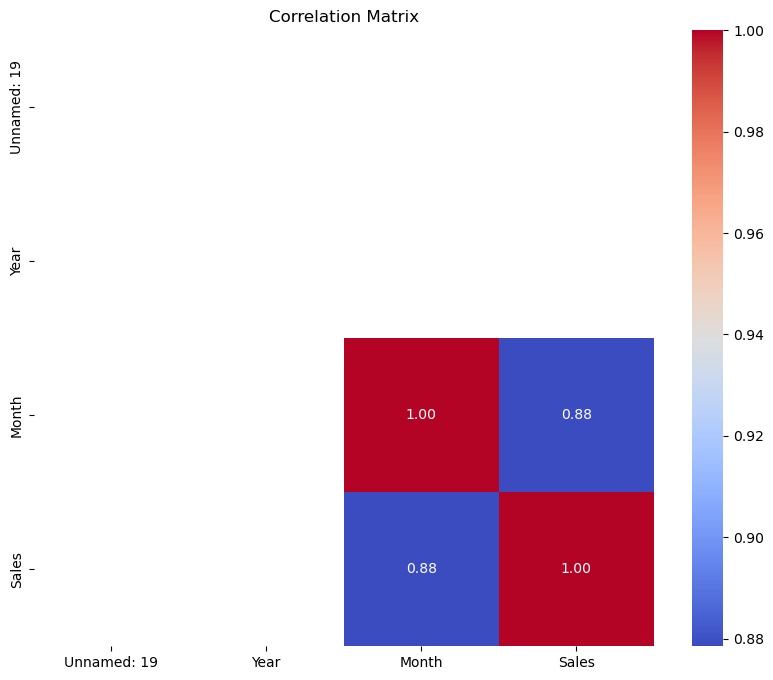

In [35]:
# correlation Analysis for the sales data

numeric_df = amazon_sales_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

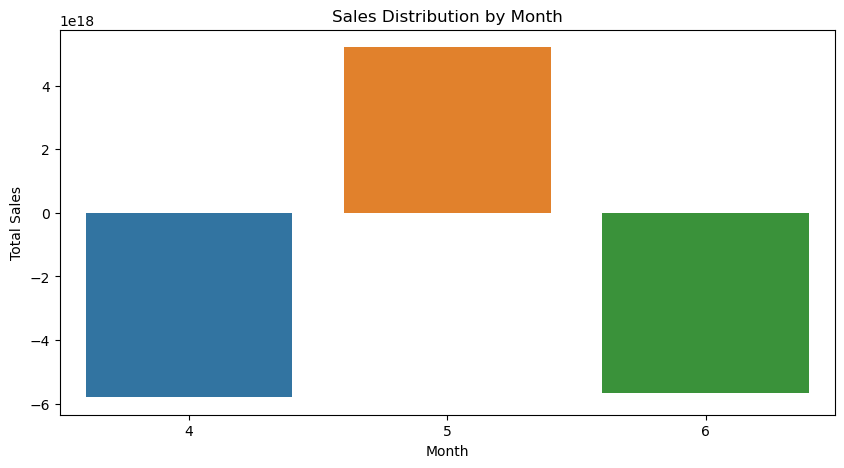

In [37]:
# bar Graph for Sales Distribution by Month

sales_by_month = amazon_sales_df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()